In [1]:
using Markdown
using InteractiveUtils

In [2]:
using Pkg
Pkg.activate("/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis")
using PyPlot
using PyCall
using Base64
using Printf
using NCDatasets
using Statistics
using AvailablePotentialEnergyFramework
using JLD
using Colors

 Activating environment at `/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/Project.toml`


In [3]:
function filter_n_times(x,smooth_time,n)
	if n <= 1
		return filter_array_time(x,smooth_time,3)
	else
        for ii in n:-1:1
 	          x=filter_array_time(x,smooth_time,3)
         end
	end
           x
end

filter_n_times (generic function with 1 method)

In [4]:
tkr = pyimport("matplotlib.ticker")# import FormatStrFormatter

PyObject <module 'matplotlib.ticker' from '/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/matplotlib/ticker.py'>

In [5]:
#default_cycler = PyPlot.matplotlib.rcsetup.cycler(color=["006BA4", "FF800E", "ABABAB", "595959", "5F9ED1", "C85200", "898989", "A2C8EC", "FFBC79", "CFCFCF"]) + PyPlot.matplotlib.rcsetup.cycler(linestyle=["-", "--", "-.","-", "--", "-.", "-", "--", "-.","-"])
#PyPlot.rc("axes",prop_cycle=default_cycler)

In [6]:
function wong_colors(alpha = 1.0)
    colors = [
        RGB(0/255, 0/255, 0/255), # black
        RGB(230/255, 159/255, 0/255), # orange
        RGB(86/255, 180/255, 233/255), # blue        
        RGB(0/255, 158/255, 115/255), # green
        RGB(240/255, 228/255, 66/255), # yellow
        RGB(0/255, 114/255, 178/255), # blue
        RGB(213/255, 94/255, 0/255), # vermillion
        RGB(204/255, 121/255, 167/255), # reddish purple
    ]
#    @. RGB(red(colors), green(colors), blue(colors))
end

wong_colors (generic function with 2 methods)

In [7]:
default_cycler = PyPlot.matplotlib.rcsetup.cycler(color=hex.(repeat(wong_colors(),3))) + PyPlot.matplotlib.rcsetup.cycler(linestyle=repeat(["-", "--", "-."],8))
PyPlot.rc("axes",prop_cycle=default_cycler)

In [8]:
data_dir = "$(ENV["SCRATCH"])/for_postprocessing/largencfiles/"
output_dir = "/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"

"/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"

In [9]:
function get_timeseries!(buf1,buf2,buf3,file_path)
 	(min_pres,max_speed) = Dataset(file_path) do ds
        NCDatasets.load!(ds["PSFC"].var,buf1,:,:,:)
        min_pres = dropdims(minimum(buf1,dims=(1,2)),dims=(1,2))
        NCDatasets.load!(ds["USFC"].var,buf1,:,:,:)
        NCDatasets.load!(ds["VSFC"].var,buf2,:,:,:)
        #pres = variable(ds,"PSFC")[:,:,:] :: Array{Float32,3}
        #u = variable(ds,"USFC")[:,:,:] :: Array{Float32,3}
        #v = variable(ds,"VSFC")[:,:,:] :: Array{Float32,3}
        buf3 .= hypot.(buf1,buf2)
        #min_pres = dropdims(minimum(pres,dims=(1,2)),dims=(1,2))
        max_speed = dropdims(maximum(buf3,dims=(1,2)),dims=(1,2))
        (min_pres,max_speed)
    end
    return (min_pres,max_speed)
end

get_timeseries! (generic function with 1 method)

In [10]:
buf1_large = Array{Float32,3}(undef,512,512,2400)
buf2_large = Array{Float32,3}(undef,512,512,2400)
buf3_large = Array{Float32,3}(undef,512,512,2400)

buf1_small = Array{Float32,3}(undef,512,512,1200)
buf2_small = Array{Float32,3}(undef,512,512,1200)
buf3_small = Array{Float32,3}(undef,512,512,1200);

In [11]:
pres_control,sp_control = get_timeseries!(buf1_large,buf2_large,buf3_large,joinpath(data_dir,"f5e-4_2km_1000km_control_2d.nc"))

(Float32[1002.4056, 1002.3754, 1002.3823, 1002.3779, 1002.3767, 1002.3719, 1002.3759, 1002.3674, 1002.3773, 1002.3736  …  951.1968, 950.5012, 950.2955, 950.8586, 951.603, 952.374, 953.1028, 954.127, 954.1746, 953.3327], Float32[0.8350251, 2.8423893, 4.0140676, 5.099629, 5.280804, 5.5258965, 6.1996136, 6.8764663, 6.4703655, 6.7563105  …  45.20404, 43.33622, 47.105515, 44.549862, 40.76069, 40.709194, 53.64911, 45.043465, 44.959816, 46.965973])

In [ ]:
pres_homoSfc,sp_homoSfc = get_timeseries!(buf1_large,buf2_large,buf3_large,joinpath(data_dir,"f5e-4_2km_1000km_homoSfc_2d.nc"))

In [ ]:
pres_homoRad,sp_homoRad = get_timeseries!(buf1_large,buf2_large,buf3_large,joinpath(data_dir,"f5e-4_2km_1000km_homoRad_2d.nc"))

In [ ]:
pres_homoRad_homoSfc,sp_homoRad_homoSfc = get_timeseries!(buf1_large,buf2_large,buf3_large,joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_2d.nc"))

In [ ]:
pres_control_ens1,sp_control_ens1 = get_timeseries!(buf1_small,buf2_small,buf3_small,joinpath(data_dir,"f5e-4_2km_1000km_control_ensemble1_2d.nc"))

In [ ]:
pres_control_ens2,sp_control_ens2 = get_timeseries!(buf1_small,buf2_small,buf3_small,joinpath(data_dir,"f5e-4_2km_1000km_control_ensemble2_2d.nc"));

In [ ]:
pres_homoRad_ens1,sp_homoRad_ens1 = get_timeseries!(buf1_small,buf2_small,buf3_small,joinpath(data_dir,"f5e-4_2km_1000km_homoRad_ensemble1_2d.nc"))

In [ ]:
pres_homoRad_ens2,sp_homoRad_ens2 = get_timeseries!(buf1_small,buf2_small,buf3_small,joinpath(data_dir,"f5e-4_2km_1000km_homoRad_ensemble2_2d.nc"));

In [ ]:
pres_homoSfc_ens1,sp_homoSfc_ens1 = get_timeseries!(buf1_small,buf2_small,buf3_small,joinpath(data_dir,"f5e-4_2km_1000km_homoSfc_ensemble1_2d.nc"))

In [ ]:
pres_homoSfc_ens2,sp_homoSfc_ens2 = get_timeseries!(buf1_small,buf2_small,buf3_small,joinpath(data_dir,"f5e-4_2km_1000km_homoSfc_ensemble2_2d.nc"));

In [ ]:
pres_homoRad_homoSfc_ens1,sp_homoRad_homoSfc_ens1 = get_timeseries!(buf1_small,buf2_small,buf3_small,joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_ensemble1_2d.nc"))

In [ ]:
pres_homoRad_homoSfc_ens2,sp_homoRad_homoSfc_ens2 = get_timeseries!(buf1_small,buf2_small,buf3_small,joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_ensemble2_2d.nc"));

In [ ]:
pres_control_nonudge,sp_control_nonudge = get_timeseries!(buf1_small,buf2_small,buf3_small,joinpath(data_dir,"f5e-4_2km_1000km_control_nonudge_2d.nc"));

In [ ]:
pres_homoRad_nonudge,sp_homoRad_nonudge = get_timeseries!(buf1_small,buf2_small,buf3_small,joinpath(data_dir,"f5e-4_2km_1000km_homoRad_nonudge_2d.nc"));

In [ ]:
pres_homoSfc_nonudge,sp_homoSfc_nonudge = get_timeseries!(buf1_small,buf2_small,buf3_small,joinpath(data_dir,"f5e-4_2km_1000km_homoSfc_nonudge_2d.nc"));

In [ ]:
pres_homoRad_homoSfc_nonudge,sp_homoRad_homoSfc_nonudge = get_timeseries!(buf1_small,buf2_small,buf3_small,joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_nonudge_2d.nc"));

In [ ]:
times = Dataset(joinpath(data_dir,"f5e-4_2km_1000km_control_2d.nc")) do ds
	variable(ds,"time")[:]
    end;

In [ ]:
pres_control_ensemble_mean = mean([pres_control[1:1200],pres_control_ens1,pres_control_ens2])
pres_control_ensemble_max = max.(pres_control[1:1200],pres_control_ens1,pres_control_ens2)
pres_control_ensemble_min = min.(pres_control[1:1200],pres_control_ens1,pres_control_ens2)
sp_control_ensemble_mean = mean([sp_control[1:1200],sp_control_ens1,sp_control_ens2])
sp_control_ensemble_max = max.(sp_control[1:1200],sp_control_ens1,sp_control_ens2)
sp_control_ensemble_min = min.(sp_control[1:1200],sp_control_ens1,sp_control_ens2)

pres_homoRad_ensemble_mean = mean([pres_homoRad[1:1200],pres_homoRad_ens1,pres_homoRad_ens2])
pres_homoRad_ensemble_max = max.(pres_homoRad[1:1200],pres_homoRad_ens1,pres_homoRad_ens2)
pres_homoRad_ensemble_min = min.(pres_homoRad[1:1200],pres_homoRad_ens1,pres_homoRad_ens2)
sp_homoRad_ensemble_mean = mean([sp_homoRad[1:1200],sp_homoRad_ens1,sp_homoRad_ens2])
sp_homoRad_ensemble_max = max.(sp_homoRad[1:1200],sp_homoRad_ens1,sp_homoRad_ens2)
sp_homoRad_ensemble_min = min.(sp_homoRad[1:1200],sp_homoRad_ens1,sp_homoRad_ens2)

pres_homoSfc_ensemble_mean = mean([pres_homoSfc[1:1200],pres_homoSfc_ens1,pres_homoSfc_ens2])
pres_homoSfc_ensemble_max = max.(pres_homoSfc[1:1200],pres_homoSfc_ens1,pres_homoSfc_ens2)
pres_homoSfc_ensemble_min = min.(pres_homoSfc[1:1200],pres_homoSfc_ens1,pres_homoSfc_ens2)
sp_homoSfc_ensemble_mean = mean([sp_homoSfc[1:1200],sp_homoSfc_ens1,sp_homoSfc_ens2])
sp_homoSfc_ensemble_max = max.(sp_homoSfc[1:1200],sp_homoSfc_ens1,sp_homoSfc_ens2)
sp_homoSfc_ensemble_min = min.(sp_homoSfc[1:1200],sp_homoSfc_ens1,sp_homoSfc_ens2)

pres_homoRad_homoSfc_ensemble_mean = mean([pres_homoRad_homoSfc[1:1200],pres_homoRad_homoSfc_ens1,pres_homoRad_homoSfc_ens2])
pres_homoRad_homoSfc_ensemble_max = max.(pres_homoRad_homoSfc[1:1200],pres_homoRad_homoSfc_ens1,pres_homoRad_homoSfc_ens2)
pres_homoRad_homoSfc_ensemble_min = min.(pres_homoRad_homoSfc[1:1200],pres_homoRad_homoSfc_ens1,pres_homoRad_homoSfc_ens2)
sp_homoRad_homoSfc_ensemble_mean = mean([sp_homoRad_homoSfc[1:1200],sp_homoRad_homoSfc_ens1,sp_homoRad_homoSfc_ens2])
sp_homoRad_homoSfc_ensemble_max = max.(sp_homoRad_homoSfc[1:1200],sp_homoRad_homoSfc_ens1,sp_homoRad_homoSfc_ens2)
sp_homoRad_homoSfc_ensemble_min = min.(sp_homoRad_homoSfc[1:1200],sp_homoRad_homoSfc_ens1,sp_homoRad_homoSfc_ens2);

In [ ]:
time_smooth_central = 21
times_to_smooth_central = 3
line_sp_control = vcat(filter_n_times(sp_control_ensemble_mean,time_smooth_central,times_to_smooth_central),filter_n_times(sp_control[1201:end],time_smooth_central,times_to_smooth_central))
line_sp_homoRad = vcat(filter_n_times(sp_homoRad_ensemble_mean,time_smooth_central,times_to_smooth_central),filter_n_times(sp_homoRad[1201:end],time_smooth_central,times_to_smooth_central))
line_sp_homoSfc = vcat(filter_n_times(sp_homoSfc_ensemble_mean,time_smooth_central,times_to_smooth_central),filter_n_times(sp_homoSfc[1201:end],time_smooth_central,times_to_smooth_central))
line_sp_homoRad_homoSfc = vcat(filter_n_times(sp_homoRad_homoSfc_ensemble_mean,time_smooth_central,times_to_smooth_central),filter_n_times(sp_homoRad_homoSfc[1201:end],time_smooth_central,times_to_smooth_central));

line_pres_control = vcat(filter_n_times(pres_control_ensemble_mean,time_smooth_central,times_to_smooth_central),filter_n_times(pres_control[1201:end],time_smooth_central,times_to_smooth_central))
line_pres_homoRad = vcat(filter_n_times(pres_homoRad_ensemble_mean,time_smooth_central,times_to_smooth_central),filter_n_times(pres_homoRad[1201:end],time_smooth_central,times_to_smooth_central))
line_pres_homoSfc = vcat(filter_n_times(pres_homoSfc_ensemble_mean,time_smooth_central,times_to_smooth_central),filter_n_times(pres_homoSfc[1201:end],time_smooth_central,times_to_smooth_central))
line_pres_homoRad_homoSfc = vcat(filter_n_times(pres_homoRad_homoSfc_ensemble_mean,time_smooth_central,times_to_smooth_central),filter_n_times(pres_homoRad_homoSfc[1201:end],time_smooth_central,times_to_smooth_central));

In [ ]:
line_sp_control_nonudge = filter_n_times(sp_control_nonudge,time_smooth_central,times_to_smooth_central)
line_sp_homoRad_nonudge = filter_n_times(sp_homoRad_nonudge,time_smooth_central,times_to_smooth_central)
line_sp_homoSfc_nonudge = filter_n_times(sp_homoSfc_nonudge,time_smooth_central,times_to_smooth_central)
line_sp_homoRad_homoSfc_nonudge = filter_n_times(sp_homoRad_homoSfc_nonudge,time_smooth_central,times_to_smooth_central)

line_pres_control_nonudge = filter_n_times(pres_control_nonudge,time_smooth_central,times_to_smooth_central)
line_pres_homoRad_nonudge = filter_n_times(pres_homoRad_nonudge,time_smooth_central,times_to_smooth_central)
line_pres_homoSfc_nonudge = filter_n_times(pres_homoSfc_nonudge,time_smooth_central,times_to_smooth_central)
line_pres_homoRad_homoSfc_nonudge = filter_n_times(pres_homoRad_homoSfc_nonudge,time_smooth_central,times_to_smooth_central)

In [ ]:
genesis_control = findfirst(>=(33),line_sp_control)
genesis_homoSfc = findfirst(>=(33),line_sp_homoSfc)
genesis_homoRad = findfirst(>=(33),line_sp_homoRad)
genesis_homoRad_homoSfc = findfirst(>=(33),line_sp_homoRad_homoSfc)

In [ ]:
genesis_control_nonudge = findfirst(>=(33),line_sp_control_nonudge)
genesis_homoSfc_nonudge = findfirst(>=(33),line_sp_homoSfc_nonudge)
genesis_homoRad_nonudge = findfirst(>=(33),line_sp_homoRad_nonudge)
genesis_homoRad_homoSfc_nonudge = findfirst(>=(33),line_sp_homoRad_homoSfc_nonudge)

In [ ]:
#This times are going to be used in ape_budget_plots
@show times[genesis_control]
@show times[genesis_homoRad]
@show times[genesis_homoSfc]
@show times[genesis_homoRad_homoSfc]
@show times[genesis_control_nonudge]
@show times[genesis_homoRad_nonudge]
@show times[genesis_homoSfc_nonudge]
@show times[genesis_homoRad_homoSfc_nonudge]

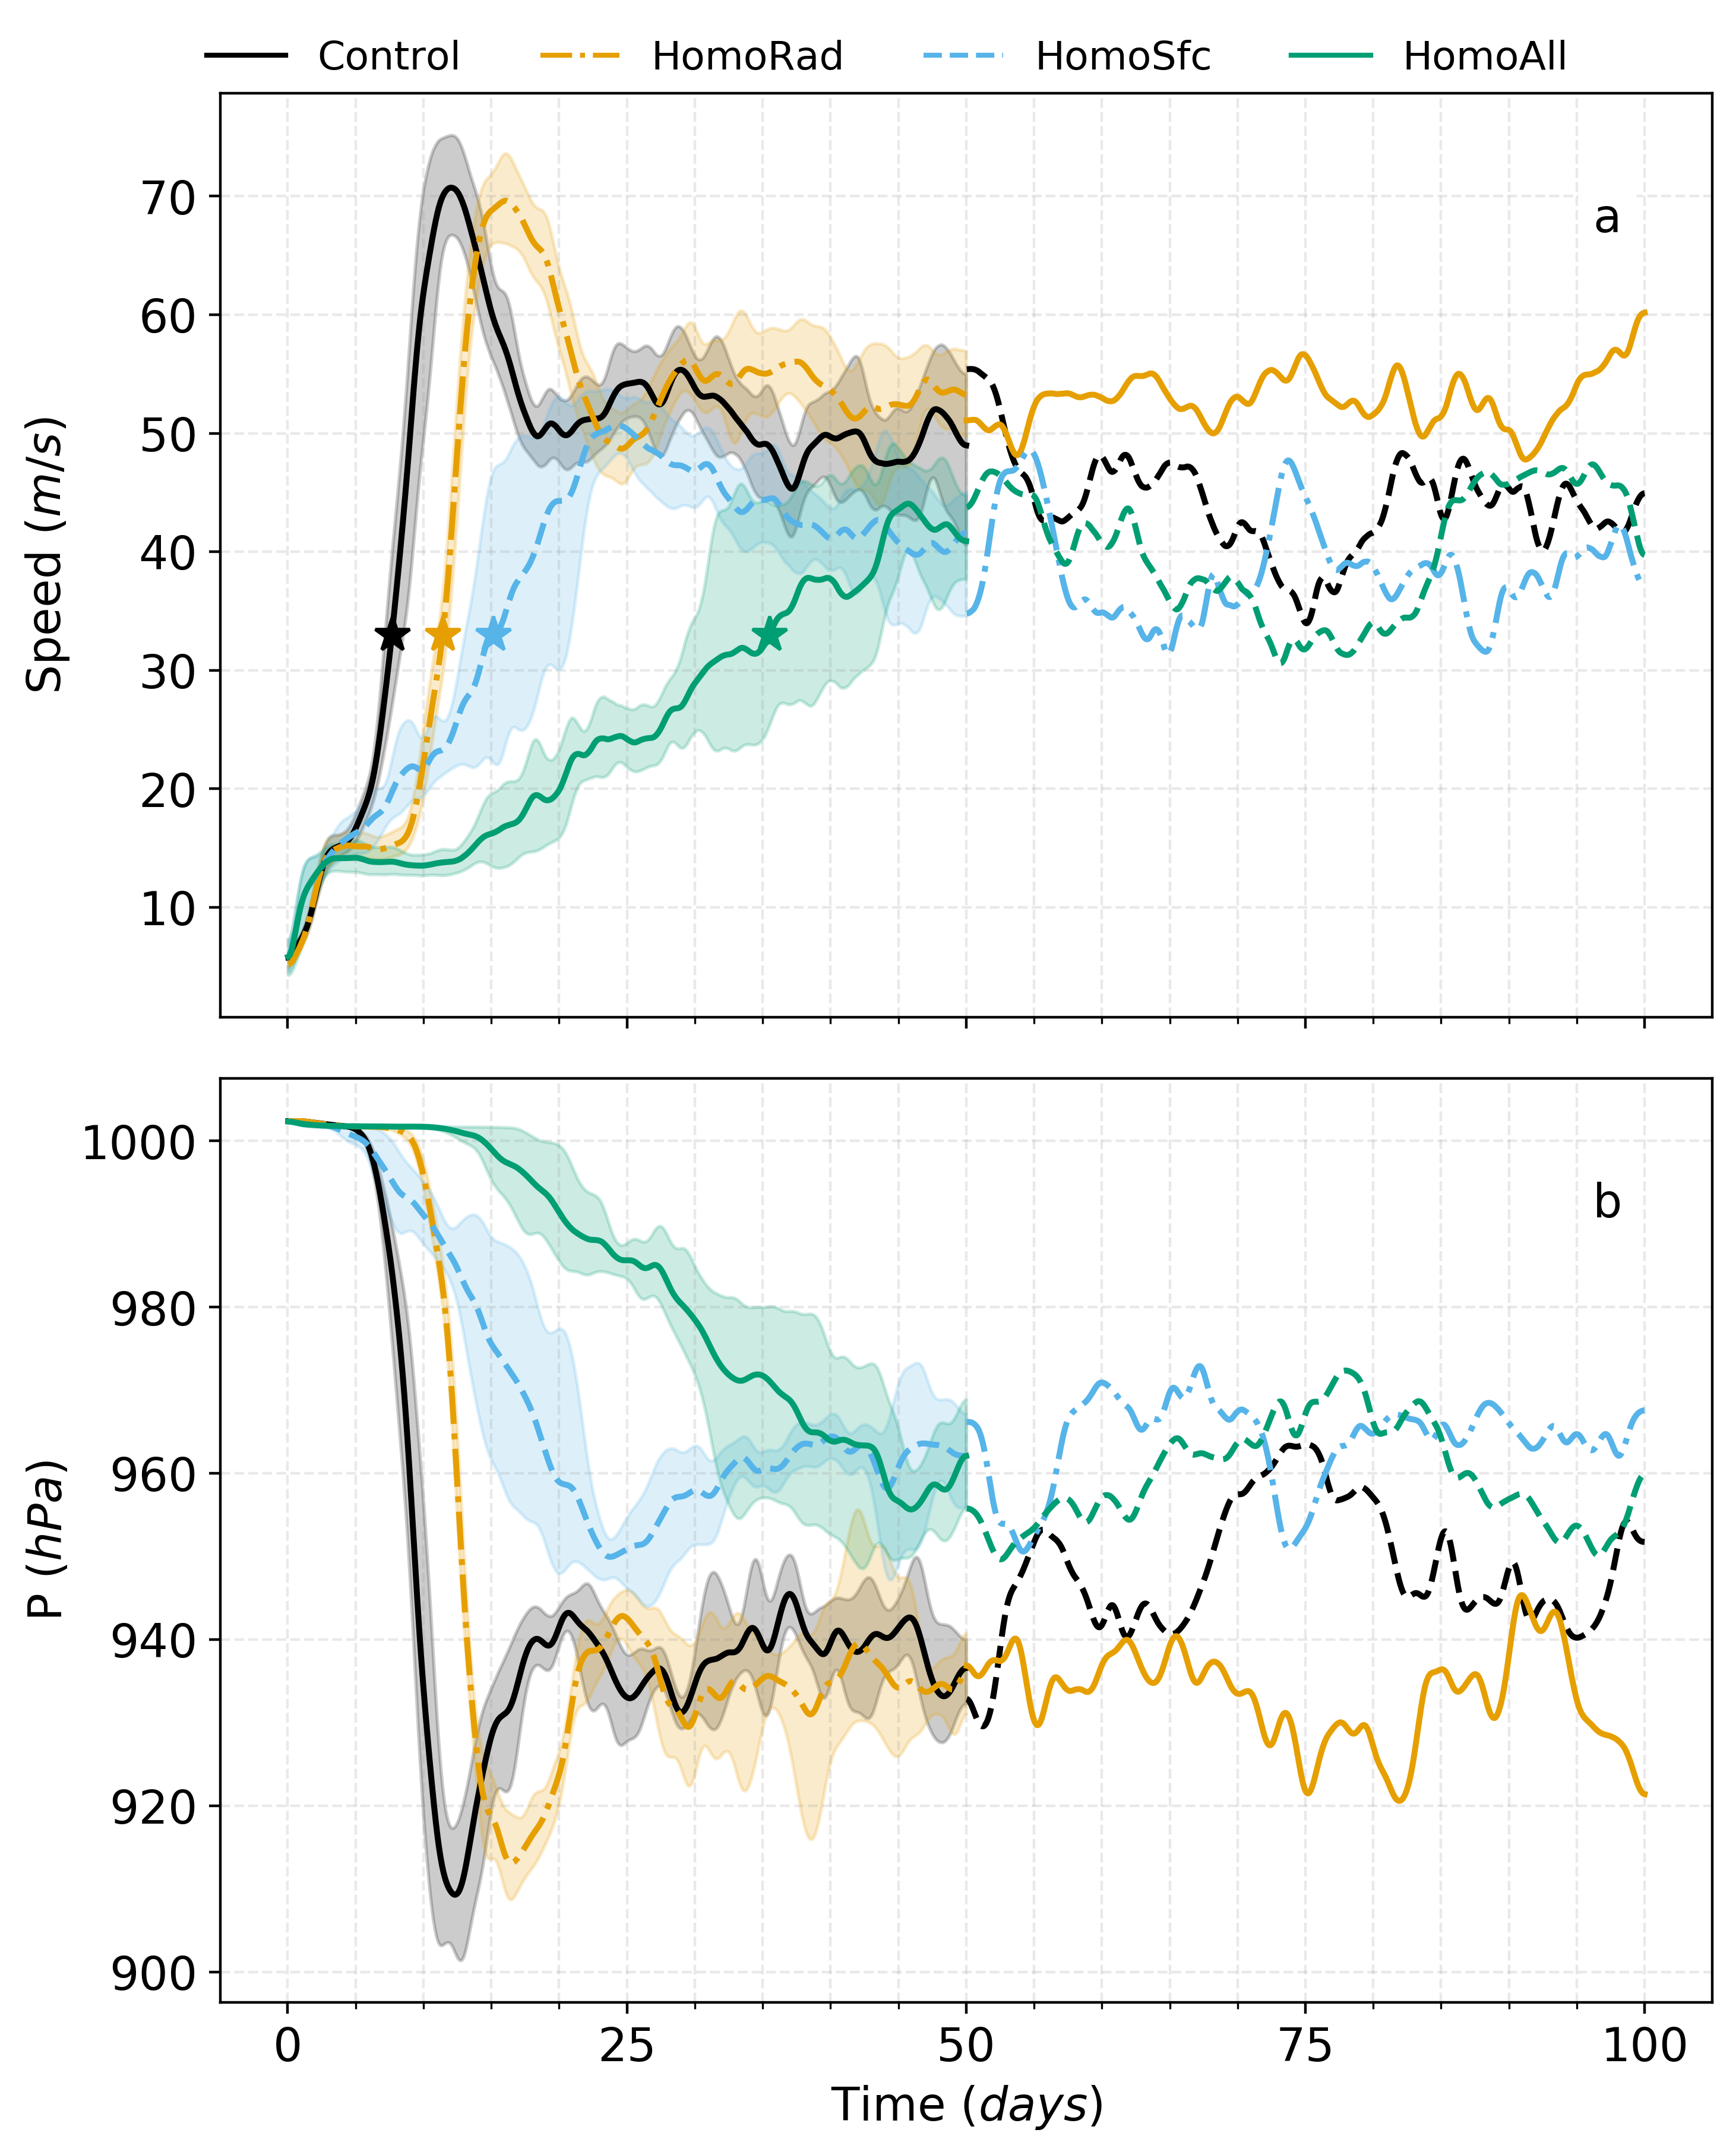

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [40]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=14)
time_smooth = 21

times_to_smooth=3

ribbon_alpha = 0.2
##########
fig, ax = plt.subplots(2,1,sharex=true,figsize=(2*3.74,2*4.5),dpi=400)

p1, = ax[1].plot(times[1:1200],line_sp_control[1:1200],label="Control",color="#"*hex(wong_colors()[1]))
ax[1].plot(times[1201:end],line_sp_control[1201:end],label="_nolegend_",color = p1.get_color())
p2 = ax[1].fill_between(times[1:end÷2],filter_n_times(sp_control_ensemble_min,time_smooth,times_to_smooth),filter_n_times(sp_control_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p1.get_color(),edgecolor=p1.get_color())

p3, = ax[1].plot(times[1:1200],line_sp_homoRad[1:1200],label="HomoRad",color="#"*hex(wong_colors()[2]))
ax[1].plot(times[1201:end],line_sp_homoRad[1201:end],label="_nolegend_",color = p3.get_color())
p4 = ax[1].fill_between(times[1:end÷2],filter_n_times(sp_homoRad_ensemble_min,time_smooth,times_to_smooth),filter_n_times(sp_homoRad_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p3.get_color(),edgecolor=p3.get_color())

sp_homoSfc_ensemble_min[1180:1200] .= 33.6
sp_homoSfc_ensemble_min[1194] = 36.6
sp_homoSfc_ensemble_min[1195] = 36.6
sp_homoSfc_ensemble_min[1196] = 36.6
sp_homoSfc_ensemble_min[1197] = 36.6
sp_homoSfc_ensemble_min[1198] = 36.6
sp_homoSfc_ensemble_min[1199] = 36
sp_homoSfc_ensemble_min[1200] = 30
#sp_homoSfc_ensemble_min[1170:1200] .= 30

p5, = ax[1].plot(times[1:1200],line_sp_homoSfc[1:1200],label="HomoSfc",color="#"*hex(wong_colors()[3]))
ax[1].plot(times[1201:end],line_sp_homoSfc[1201:end],label="_nolegend_",color = p5.get_color())
p6 = ax[1].fill_between(times[1:end÷2],filter_n_times(sp_homoSfc_ensemble_min,time_smooth,times_to_smooth)[1:1200],filter_n_times(sp_homoSfc_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p5.get_color(),edgecolor=p5.get_color())
#ax[1].plot(times,sp_homoSfc)

p7, = ax[1].plot(times[1:1200],line_sp_homoRad_homoSfc[1:1200],label="HomoAll",color="#"*hex(wong_colors()[4]))
ax[1].plot(times[1201:end],line_sp_homoRad_homoSfc[1201:end],label="_nolegend_",color = p7.get_color())
p8 = ax[1].fill_between(times[1:end÷2],filter_n_times(sp_homoRad_homoSfc_ensemble_min,time_smooth,times_to_smooth),filter_n_times(sp_homoRad_homoSfc_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p7.get_color(),edgecolor=p7.get_color())
ax[1].set_ylabel(string("Speed ",L"(m/s)"))
###
#p9, = ax[1].plot(times[1:1200],line_sp_control_nonudge,label="Control no nudging")
#p10, = ax[1].plot(times[1:1200],line_sp_homoRad_nonudge,label="HomoRad no nudging")
#p11, = ax[1].plot(times[1:1200],line_sp_homoSfc_nonudge,label="HomoSfc no nudging")
#p12, = ax[1].plot(times[1:1200],line_sp_homoAll_nonudge,label="HomoAll no nudging")


###
ax[1].plot(times[genesis_control],[33],"*",markersize=11,color=p1.get_color())
ax[1].plot(times[genesis_homoRad],[33],"*",markersize=11,color=p3.get_color())	
ax[1].plot(times[genesis_homoSfc],[33],"*",markersize=11,color=p5.get_color())	
ax[1].plot(times[genesis_homoRad_homoSfc],[33],"*",markersize=11,color=p7.get_color())

#ax[1].plot(times[genesis_control_nonudge],[33],"*",markersize=11,color=p9.get_color())
#ax[1].plot(times[genesis_homoRad_nonudge],[33],"*",markersize=11,color=p10.get_color())	
#ax[1].plot(times[genesis_homoSfc_nonudge],[33],"*",markersize=11,color=p11.get_color())	
#ax[1].plot(times[genesis_homoRad_homoSfc_nonudge],[33],"*",markersize=11,color=p12.get_color())

#######################

p9, = ax[2].plot(times[1:1200],line_pres_control[1:1200],label="Control",color="#"*hex(wong_colors()[1]))
ax[2].plot(times[1201:end],line_pres_control[1201:end],label="_nolegend_",color = p1.get_color())
p10 = ax[2].fill_between(times[1:end÷2],filter_n_times(pres_control_ensemble_min,time_smooth,times_to_smooth),filter_n_times(pres_control_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p1.get_color(),edgecolor=p1.get_color())

p11, = ax[2].plot(times[1:1200],line_pres_homoRad[1:1200],label="HomoRad",color="#"*hex(wong_colors()[2]))
ax[2].plot(times[1201:end],line_pres_homoRad[1201:end],label="_nolegend_",color = p3.get_color())
p12 = ax[2].fill_between(times[1:end÷2],filter_n_times(pres_homoRad_ensemble_min,time_smooth,times_to_smooth),filter_n_times(pres_homoRad_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p3.get_color(),edgecolor=p3.get_color())

p13, = ax[2].plot(times[1:1200],line_pres_homoSfc[1:1200],label="HomoSfc",color="#"*hex(wong_colors()[3]))
ax[2].plot(times[1201:end],line_pres_homoSfc[1201:end],label="_nolegend_",color = p5.get_color())
p14 = ax[2].fill_between(times[1:end÷2],filter_n_times(pres_homoSfc_ensemble_min,time_smooth,times_to_smooth),filter_n_times(pres_homoSfc_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p5.get_color(),edgecolor=p5.get_color())


p15, = ax[2].plot(times[1:1200],line_pres_homoRad_homoSfc[1:1200],label="HomoAll",color="#"*hex(wong_colors()[4]))
ax[2].plot(times[1201:end],line_pres_homoRad_homoSfc[1201:end],label="_nolegend_",color = p7.get_color())
p16 = ax[2].fill_between(times[1:end÷2],filter_n_times(pres_homoRad_homoSfc_ensemble_min,time_smooth,times_to_smooth),filter_n_times(pres_homoRad_homoSfc_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p7.get_color(),edgecolor=p7.get_color())

###

#p9, = ax[1].plot(times[1:1200],line_pres_control_nonudge,label="Control no nudging")
#p10, = ax[1].plot(times[1:1200],line_pres_homoRad_nonudge,label="HomoRad no nudging")
#p11, = ax[1].plot(times[1:1200],line_pres_homoSfc_nonudge,label="HomoSfc no nudging")
#p12, = ax[1].plot(times[1:1200],line_pres_homoAll_nonudge,label="HomoAll no nudging")

	
ax[2].set_ylabel(string("P ",L"(hPa)"))

#######################
ax[2].set_xlabel(string("Time ",L"(days)"))
ax[1].yaxis.set_label_coords(-0.1,0.5)
ax[1].minorticks_on()
ax[1].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.3)
ax[2].yaxis.set_label_coords(-0.1,0.5)
ax[1].annotate("a", xy=(0.92, 0.85), xycoords="axes fraction",backgroundcolor="white")
ax[2].annotate("b", xy=(0.92, 0.85), xycoords="axes fraction",backgroundcolor="white")
plt.tight_layout()
ax[1].legend(loc = (-0.02, 1), ncol=4 ,frameon=false,fontsize=12)
lw = 1.8
[ln.set_linewidth(lw) for i in 1:length(ax) for ln in ax[i].lines ]
ax[1].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[1].xaxis.set_major_locator(tkr.MultipleLocator(25))
ax[1].yaxis.set_minor_locator(plt.NullLocator())
ax[1].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
ax[2].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[2].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
savefig(joinpath(output_dir,"time_comparisons_mechanism_denial.png"), bbox_inches="tight")
savefig(joinpath(output_dir,"time_comparisons_mechanism_denial.eps"), bbox_inches="tight")
savefig(joinpath(output_dir,"time_comparisons_mechanism_denial.pdf"), bbox_inches="tight")

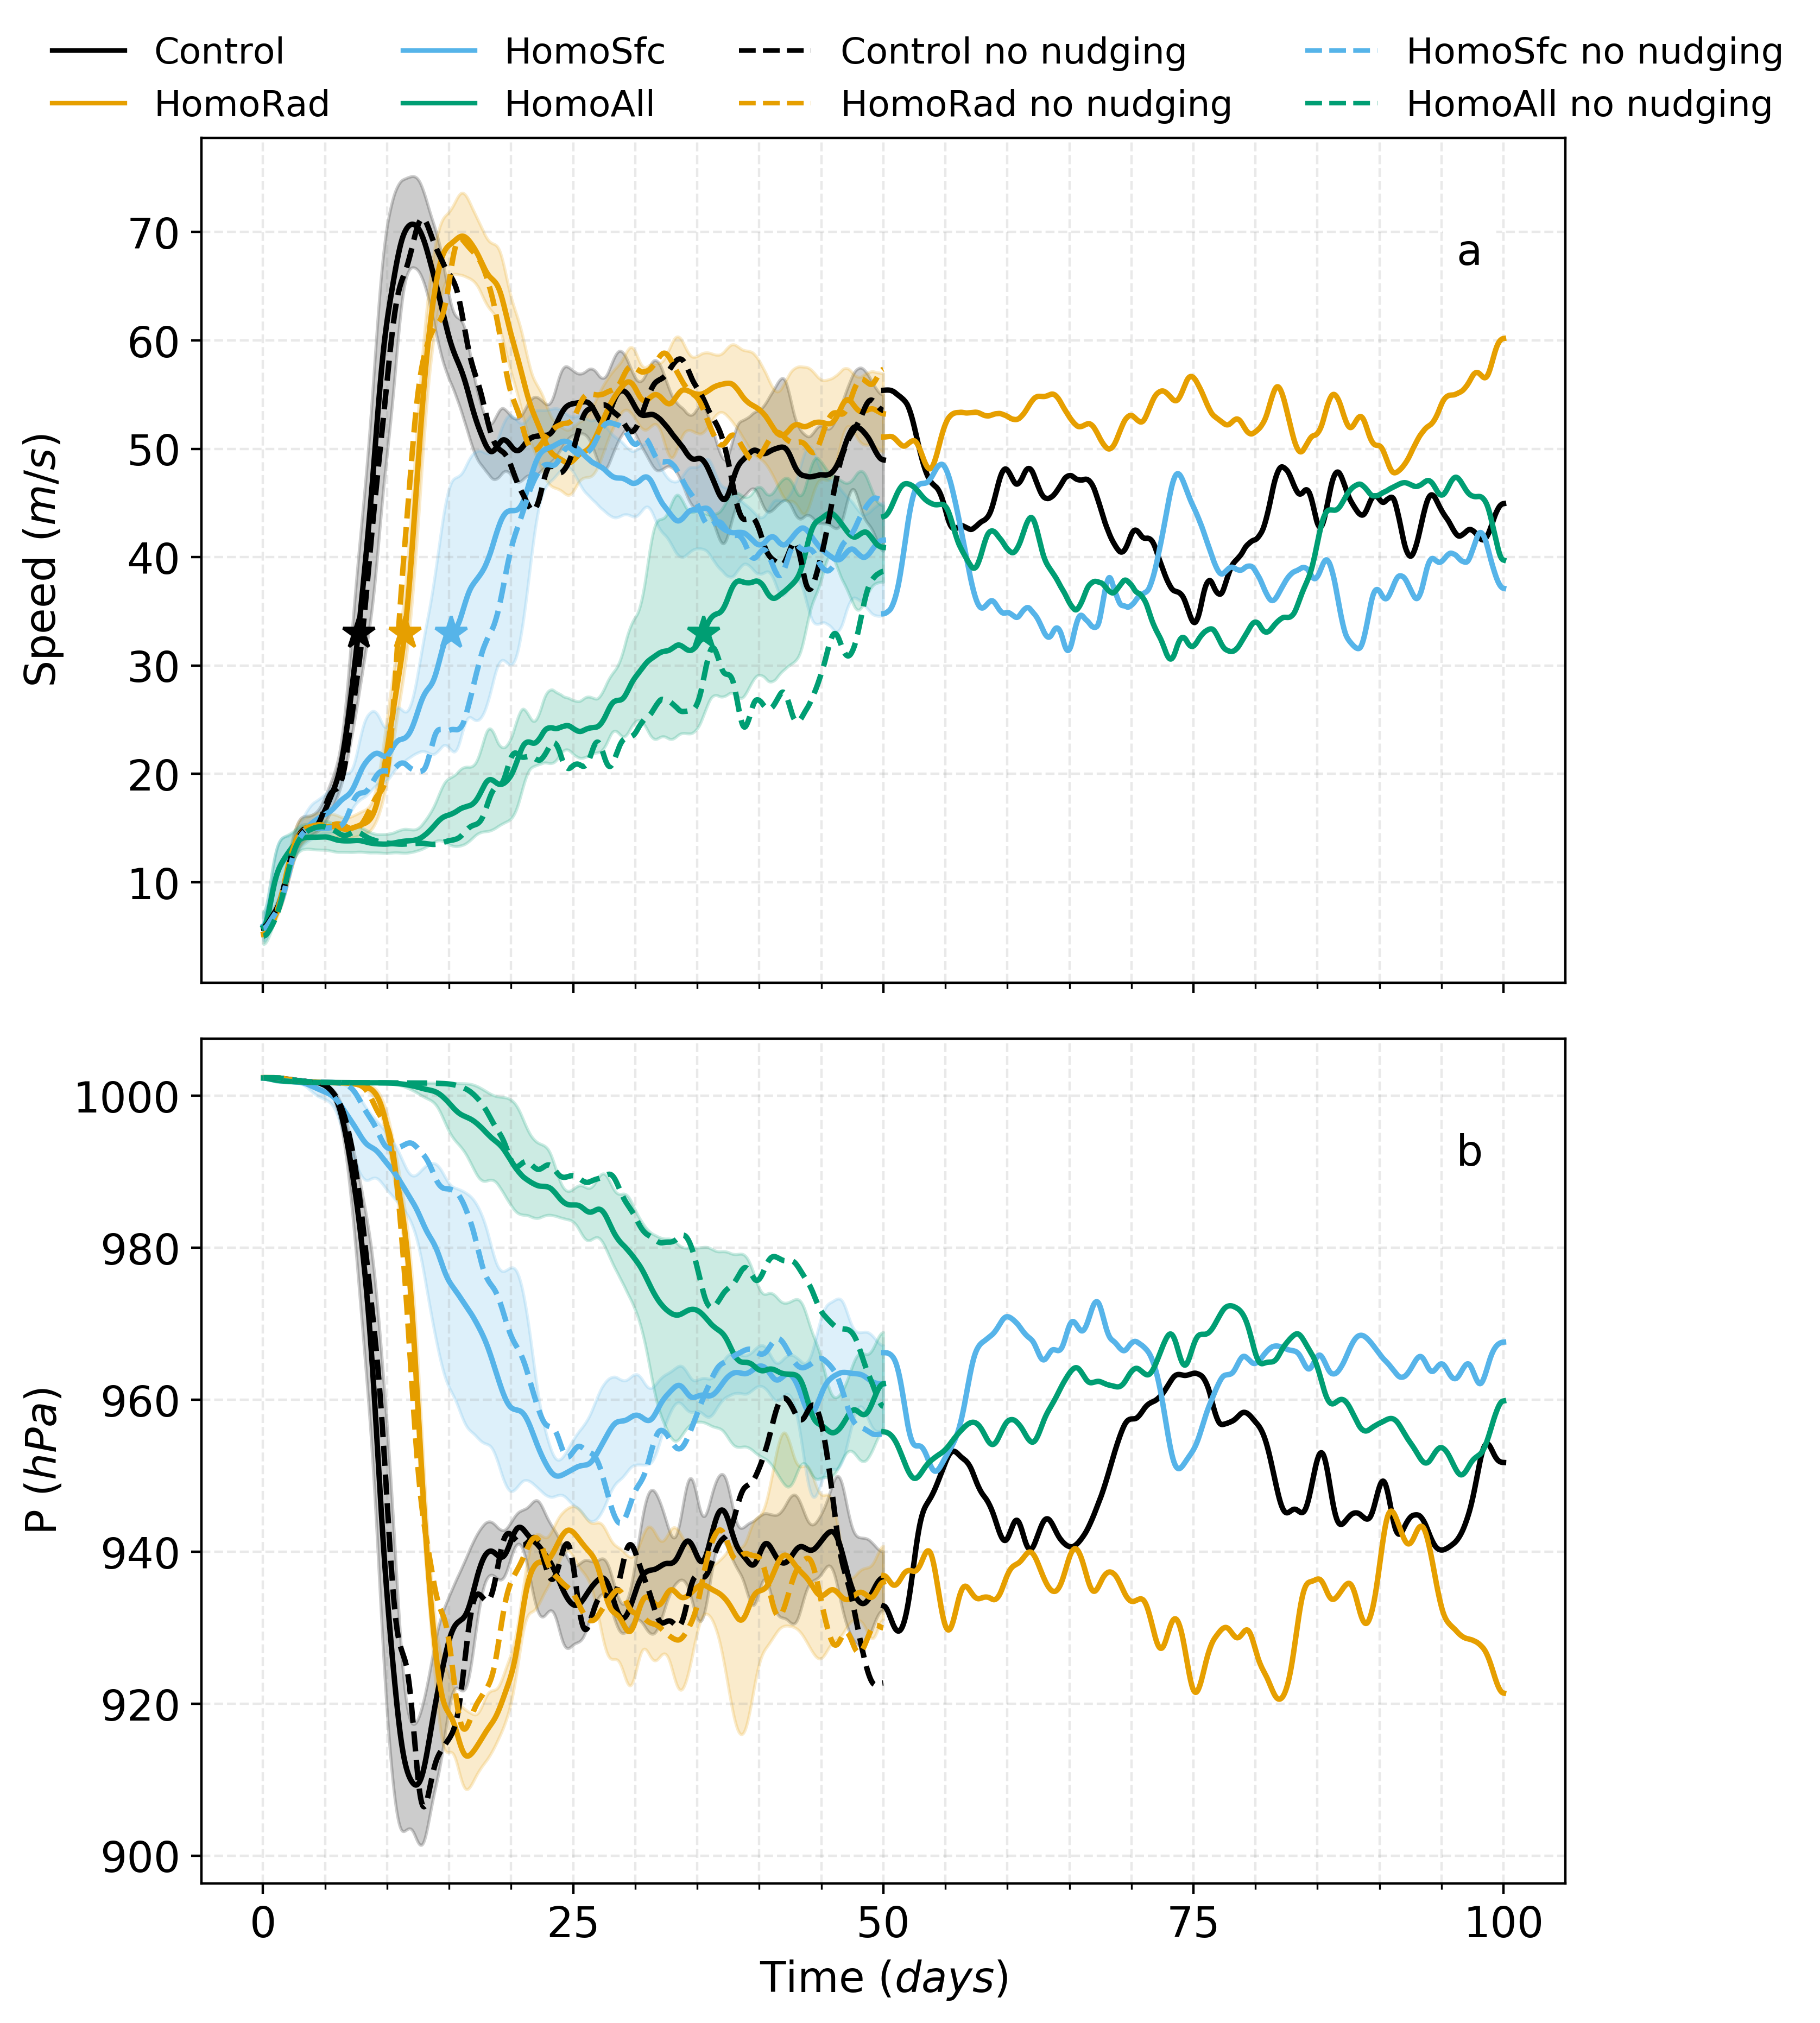

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [41]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=14)
time_smooth = 21

times_to_smooth=3

ribbon_alpha = 0.2
##########
fig, ax = plt.subplots(2,1,sharex=true,figsize=(2*3.74,2*4.5),dpi=400)

p1, = ax[1].plot(times[1:1200],line_sp_control[1:1200],label="Control",color="#"*hex(wong_colors()[1]),linestyle="-")
ax[1].plot(times[1201:end],line_sp_control[1201:end],label="_nolegend_",color = p1.get_color(),linestyle="-")
p2 = ax[1].fill_between(times[1:end÷2],filter_n_times(sp_control_ensemble_min,time_smooth,times_to_smooth),filter_n_times(sp_control_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p1.get_color(),edgecolor=p1.get_color())

p3, = ax[1].plot(times[1:1200],line_sp_homoRad[1:1200],label="HomoRad",color="#"*hex(wong_colors()[2]),linestyle="-")
ax[1].plot(times[1201:end],line_sp_homoRad[1201:end],label="_nolegend_",color = p3.get_color(),linestyle="-")
p4 = ax[1].fill_between(times[1:end÷2],filter_n_times(sp_homoRad_ensemble_min,time_smooth,times_to_smooth),filter_n_times(sp_homoRad_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p3.get_color(),edgecolor=p3.get_color())

sp_homoSfc_ensemble_min[1180:1200] .= 33.6
sp_homoSfc_ensemble_min[1194] = 36.6
sp_homoSfc_ensemble_min[1195] = 36.6
sp_homoSfc_ensemble_min[1196] = 36.6
sp_homoSfc_ensemble_min[1197] = 36.6
sp_homoSfc_ensemble_min[1198] = 36.6
sp_homoSfc_ensemble_min[1199] = 36
sp_homoSfc_ensemble_min[1200] = 30
#sp_homoSfc_ensemble_min[1170:1200] .= 30

p5, = ax[1].plot(times[1:1200],line_sp_homoSfc[1:1200],label="HomoSfc",color="#"*hex(wong_colors()[3]),linestyle="-")
ax[1].plot(times[1201:end],line_sp_homoSfc[1201:end],label="_nolegend_",color = p5.get_color(),linestyle="-")
p6 = ax[1].fill_between(times[1:end÷2],filter_n_times(sp_homoSfc_ensemble_min,time_smooth,times_to_smooth)[1:1200],filter_n_times(sp_homoSfc_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p5.get_color(),edgecolor=p5.get_color())
#ax[1].plot(times,sp_homoSfc)

p7, = ax[1].plot(times[1:1200],line_sp_homoRad_homoSfc[1:1200],label="HomoAll",color="#"*hex(wong_colors()[4]),linestyle="-")
ax[1].plot(times[1201:end],line_sp_homoRad_homoSfc[1201:end],label="_nolegend_",color = p7.get_color(),linestyle="-")
p8 = ax[1].fill_between(times[1:end÷2],filter_n_times(sp_homoRad_homoSfc_ensemble_min,time_smooth,times_to_smooth),filter_n_times(sp_homoRad_homoSfc_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p7.get_color(),edgecolor=p7.get_color())
ax[1].set_ylabel(string("Speed ",L"(m/s)"))
###
p9, = ax[1].plot(times[1:1200],line_sp_control_nonudge,label="Control no nudging",color="#"*hex(wong_colors()[1]),linestyle="--")
p10, = ax[1].plot(times[1:1200],line_sp_homoRad_nonudge,label="HomoRad no nudging",color="#"*hex(wong_colors()[2]),linestyle="--")
p11, = ax[1].plot(times[1:1200],line_sp_homoSfc_nonudge,label="HomoSfc no nudging",color="#"*hex(wong_colors()[3]),linestyle="--")
p12, = ax[1].plot(times[1:1200],line_sp_homoRad_homoSfc_nonudge,label="HomoAll no nudging",color="#"*hex(wong_colors()[4]),linestyle="--")


###
ax[1].plot(times[genesis_control],[33],"*",markersize=11,color=p1.get_color())
ax[1].plot(times[genesis_homoRad],[33],"*",markersize=11,color=p3.get_color())	
ax[1].plot(times[genesis_homoSfc],[33],"*",markersize=11,color=p5.get_color())	
ax[1].plot(times[genesis_homoRad_homoSfc],[33],"*",markersize=11,color=p7.get_color())

#ax[1].plot(times[genesis_control_nonudge],[33],"*",markersize=11,color=p9.get_color())
#ax[1].plot(times[genesis_homoRad_nonudge],[33],"*",markersize=11,color=p10.get_color())	
#ax[1].plot(times[genesis_homoSfc_nonudge],[33],"*",markersize=11,color=p11.get_color())	
#ax[1].plot(times[genesis_homoRad_homoSfc_nonudge],[33],"*",markersize=11,color=p12.get_color())

#######################

p9, = ax[2].plot(times[1:1200],line_pres_control[1:1200],label="Control",color="#"*hex(wong_colors()[1]),linestyle="-")
ax[2].plot(times[1201:end],line_pres_control[1201:end],label="_nolegend_",color = p1.get_color(),linestyle="-")
p10 = ax[2].fill_between(times[1:end÷2],filter_n_times(pres_control_ensemble_min,time_smooth,times_to_smooth),filter_n_times(pres_control_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p1.get_color(),edgecolor=p1.get_color())

p11, = ax[2].plot(times[1:1200],line_pres_homoRad[1:1200],label="HomoRad",color="#"*hex(wong_colors()[2]),linestyle="-")
ax[2].plot(times[1201:end],line_pres_homoRad[1201:end],label="_nolegend_",color = p3.get_color(),linestyle="-")
p12 = ax[2].fill_between(times[1:end÷2],filter_n_times(pres_homoRad_ensemble_min,time_smooth,times_to_smooth),filter_n_times(pres_homoRad_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p3.get_color(),edgecolor=p3.get_color())

p13, = ax[2].plot(times[1:1200],line_pres_homoSfc[1:1200],label="HomoSfc",color="#"*hex(wong_colors()[3]),linestyle="-")
ax[2].plot(times[1201:end],line_pres_homoSfc[1201:end],label="_nolegend_",color = p5.get_color(),linestyle="-")
p14 = ax[2].fill_between(times[1:end÷2],filter_n_times(pres_homoSfc_ensemble_min,time_smooth,times_to_smooth),filter_n_times(pres_homoSfc_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p5.get_color(),edgecolor=p5.get_color())


p15, = ax[2].plot(times[1:1200],line_pres_homoRad_homoSfc[1:1200],label="HomoAll",color="#"*hex(wong_colors()[4]),linestyle="-")
ax[2].plot(times[1201:end],line_pres_homoRad_homoSfc[1201:end],label="_nolegend_",color = p7.get_color(),linestyle="-")
p16 = ax[2].fill_between(times[1:end÷2],filter_n_times(pres_homoRad_homoSfc_ensemble_min,time_smooth,times_to_smooth),filter_n_times(pres_homoRad_homoSfc_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p7.get_color(),edgecolor=p7.get_color())

###

p9, = ax[2].plot(times[1:1200],line_pres_control_nonudge,label="Control no nudging",color="#"*hex(wong_colors()[1]),linestyle="--")
p10, = ax[2].plot(times[1:1200],line_pres_homoRad_nonudge,label="HomoRad no nudging",color="#"*hex(wong_colors()[2]),linestyle="--")
p11, = ax[2].plot(times[1:1200],line_pres_homoSfc_nonudge,label="HomoSfc no nudging",color="#"*hex(wong_colors()[3]),linestyle="--")
p12, = ax[2].plot(times[1:1200],line_pres_homoRad_homoSfc_nonudge,label="HomoAll no nudging",color="#"*hex(wong_colors()[4]),linestyle="--")

	
ax[2].set_ylabel(string("P ",L"(hPa)"))

#######################
ax[2].set_xlabel(string("Time ",L"(days)"))
ax[1].yaxis.set_label_coords(-0.1,0.5)
ax[1].minorticks_on()
ax[1].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.3)
ax[2].yaxis.set_label_coords(-0.1,0.5)
ax[1].annotate("a", xy=(0.92, 0.85), xycoords="axes fraction",backgroundcolor="white")
ax[2].annotate("b", xy=(0.92, 0.85), xycoords="axes fraction",backgroundcolor="white")
plt.tight_layout()
ax[1].legend(loc = (-0.12, 1), ncol=4 ,frameon=false,fontsize=12)
lw = 1.8
[ln.set_linewidth(lw) for i in 1:length(ax) for ln in ax[i].lines ]
ax[1].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[1].xaxis.set_major_locator(tkr.MultipleLocator(25))
ax[1].yaxis.set_minor_locator(plt.NullLocator())
ax[1].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
ax[2].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[2].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
savefig(joinpath(output_dir,"time_comparisons_mechanism_denial_nonudge.png"), bbox_inches="tight")
savefig(joinpath(output_dir,"time_comparisons_mechanism_denial_nonudge.eps"), bbox_inches="tight")
savefig(joinpath(output_dir,"time_comparisons_mechanism_denial_nonudge.pdf"), bbox_inches="tight")

In [30]:
varinfo()

| name                               |       size | summary                       |
|:---------------------------------- | ----------:|:----------------------------- |
| Base                               |            | Module                        |
| Core                               |            | Module                        |
| Main                               |            | Module                        |
| buf1_large                         |  2.344 GiB | 512×512×2400 Array{Float32,3} |
| buf1_small                         |  1.172 GiB | 512×512×1200 Array{Float32,3} |
| buf2_large                         |  2.344 GiB | 512×512×2400 Array{Float32,3} |
| buf2_small                         |  1.172 GiB | 512×512×1200 Array{Float32,3} |
| buf3_large                         |  2.344 GiB | 512×512×2400 Array{Float32,3} |
| buf3_small                         |  1.172 GiB | 512×512×1200 Array{Float32,3} |
| data_dir                           |   70 bytes | String                        |
| default_cycler                     |    8 bytes | PyObject                      |
| filter_n_times                     |    0 bytes | typeof(filter_n_times)        |
| get_timeseries!                    |    0 bytes | typeof(get_timeseries!)       |
| line_pres_control                  | 18.789 KiB | 2400-element Array{Float64,1} |
| line_pres_homoRad                  | 18.789 KiB | 2400-element Array{Float64,1} |
| line_pres_homoRad_homoSfc          | 18.789 KiB | 2400-element Array{Float64,1} |
| line_pres_homoSfc                  | 18.789 KiB | 2400-element Array{Float64,1} |
| line_sp_control                    | 18.789 KiB | 2400-element Array{Float64,1} |
| line_sp_homoRad                    | 18.789 KiB | 2400-element Array{Float64,1} |
| line_sp_homoRad_homoSfc            | 18.789 KiB | 2400-element Array{Float64,1} |
| line_sp_homoSfc                    | 18.789 KiB | 2400-element Array{Float64,1} |
| output_dir                         |   96 bytes | String                        |
| pres_control                       |  9.414 KiB | 2400-element Array{Float32,1} |
| pres_control_ens1                  |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_control_ens2                  |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_control_ensemble_max          |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_control_ensemble_mean         |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_control_ensemble_min          |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_control_nonudge               |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoRad                       |  9.414 KiB | 2400-element Array{Float32,1} |
| pres_homoRad_ens1                  |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoRad_ens2                  |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoRad_ensemble_max          |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoRad_ensemble_mean         |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoRad_ensemble_min          |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoRad_homoSfc               |  9.414 KiB | 2400-element Array{Float32,1} |
| pres_homoRad_homoSfc_ens1          |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoRad_homoSfc_ens2          |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoRad_homoSfc_ensemble_max  |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoRad_homoSfc_ensemble_mean |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoRad_homoSfc_ensemble_min  |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoRad_homoSfc_nonudge       |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoRad_nonudge               |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoSfc                       |  9.414 KiB | 2400-element Array{Float32,1} |
| pres_homoSfc_ens1                  |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoSfc_ens2                  |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoSfc_ensemble_max          |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoSfc_ensemble_mean         |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoSfc_ensemble_min          |  4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoSfc_nonudge               |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_control                         |  9.414 KiB | 2400-element Array{Float32,1} |
| sp_control_ens1                    |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_control_ens2                    |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_control_ensemble_max            |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_control_ensemble_mean           |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_control_ensemble_min            |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_control_nonudge                 |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoRad                         |  9.414 KiB | 2400-element Array{Float32,1} |
| sp_homoRad_ens1                    |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoRad_ens2                    |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoRad_ensemble_max            |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoRad_ensemble_mean           |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoRad_ensemble_min            |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoRad_homoSfc                 |  9.414 KiB | 2400-element Array{Float32,1} |
| sp_homoRad_homoSfc_ens1            |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoRad_homoSfc_ens2            |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoRad_homoSfc_ensemble_max    |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoRad_homoSfc_ensemble_mean   |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoRad_homoSfc_ensemble_min    |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoRad_homoSfc_nonudge         |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoRad_nonudge                 |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoSfc                         |  9.414 KiB | 2400-element Array{Float32,1} |
| sp_homoSfc_ens1                    |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoSfc_ens2                    |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoSfc_ensemble_max            |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoSfc_ensemble_mean           |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoSfc_ensemble_min            |  4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoSfc_nonudge                 |  4.727 KiB | 1200-element Array{Float32,1} |
| time_smooth_central                |    8 bytes | Int64                         |
| times                              |  9.414 KiB | 2400-element Array{Float32,1} |
| times_to_smooth_central            |    8 bytes | Int64                         |
| tkr                                |    8 bytes | PyObject                      |
| wong_colors                        |    0 bytes | typeof(wong_colors)           |
